#  DIABETES PREDICTION SYSTEM USING MACHINE LEARNING

In [47]:
# Importing the required libararies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import joblib

In [48]:
# Loading the dataset
data_path = 'diabetes-2.csv'
df = pd.read_csv(data_path)

In [49]:
# Displaying the first few rows of the dataset to understand the sructure of the dataset
print(df.head(50))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [50]:
# Display basic information about the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [51]:
# Remove rows where any column has a null value
df_cleaned = df.dropna()

In [52]:
# Verify if any null values are left
print(df_cleaned.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [53]:
# List of columns to replace zeros with mean because these columns can not have zero values
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing zero values with the mean of their respective columns
for column in columns_to_replace:
    mean_value = df[df[column] != 0][column].mean()
    df[column] = df[column].replace(0, mean_value)

In [54]:
# Verifying the changes in the columns
print(df.head(50))

    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0             6    148.0      72.000000       35.00000  155.548223  33.600000   
1             1     85.0      66.000000       29.00000  155.548223  26.600000   
2             8    183.0      64.000000       29.15342  155.548223  23.300000   
3             1     89.0      66.000000       23.00000   94.000000  28.100000   
4             0    137.0      40.000000       35.00000  168.000000  43.100000   
5             5    116.0      74.000000       29.15342  155.548223  25.600000   
6             3     78.0      50.000000       32.00000   88.000000  31.000000   
7            10    115.0      72.405184       29.15342  155.548223  35.300000   
8             2    197.0      70.000000       45.00000  543.000000  30.500000   
9             8    125.0      96.000000       29.15342  155.548223  32.457464   
10            4    110.0      92.000000       29.15342  155.548223  37.600000   
11           10    168.0    

In [55]:
# Descriptive statistics for the dataset
descriptive_stats = df.describe()
# Displaying the descriptive statistics
print(descriptive_stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

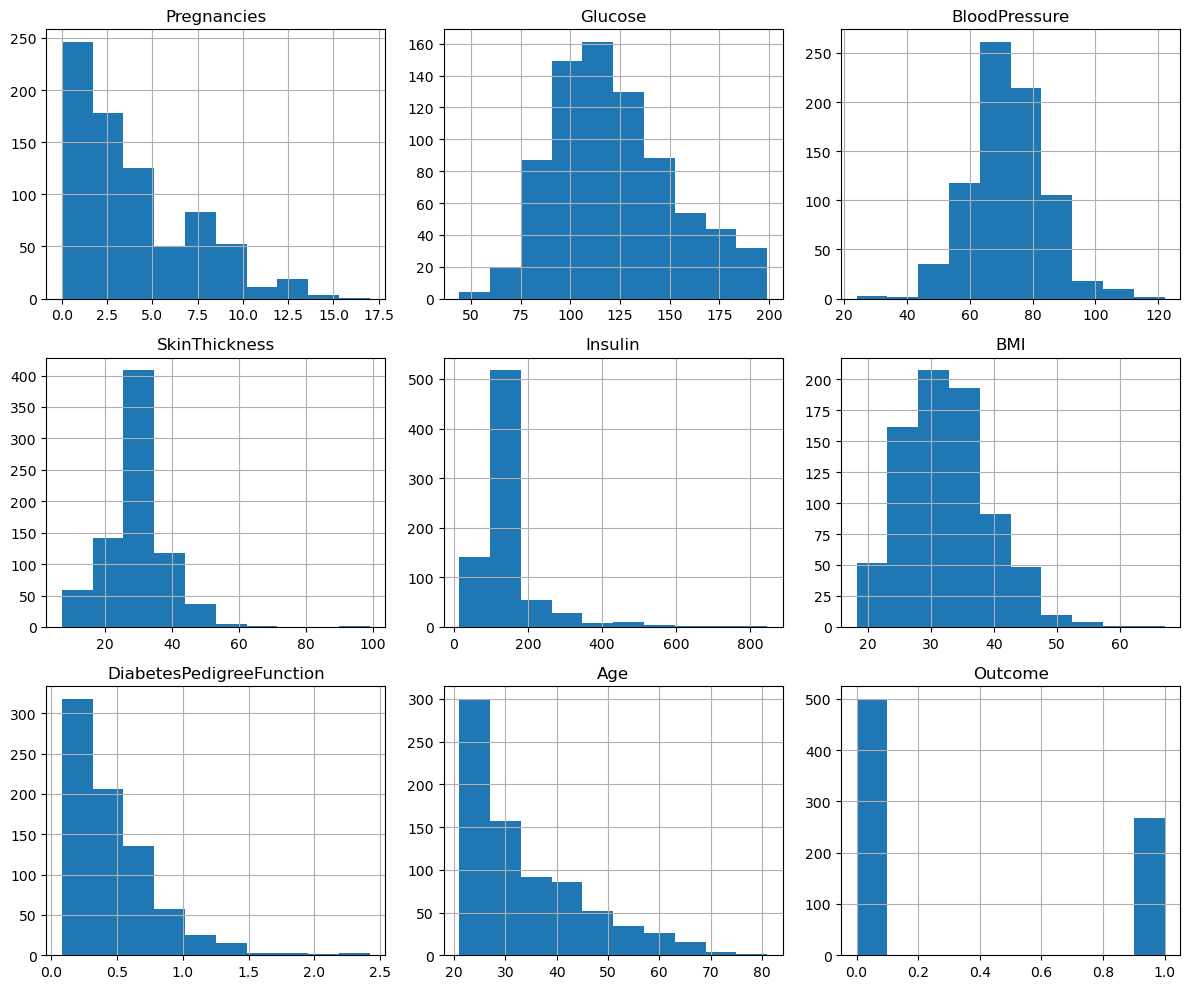

In [56]:
# Histograms for all columns / features
df.hist(figsize=(12, 10))
plt.tight_layout()  # Adjusts plot parameters to give a pleasing layout
plt.show()

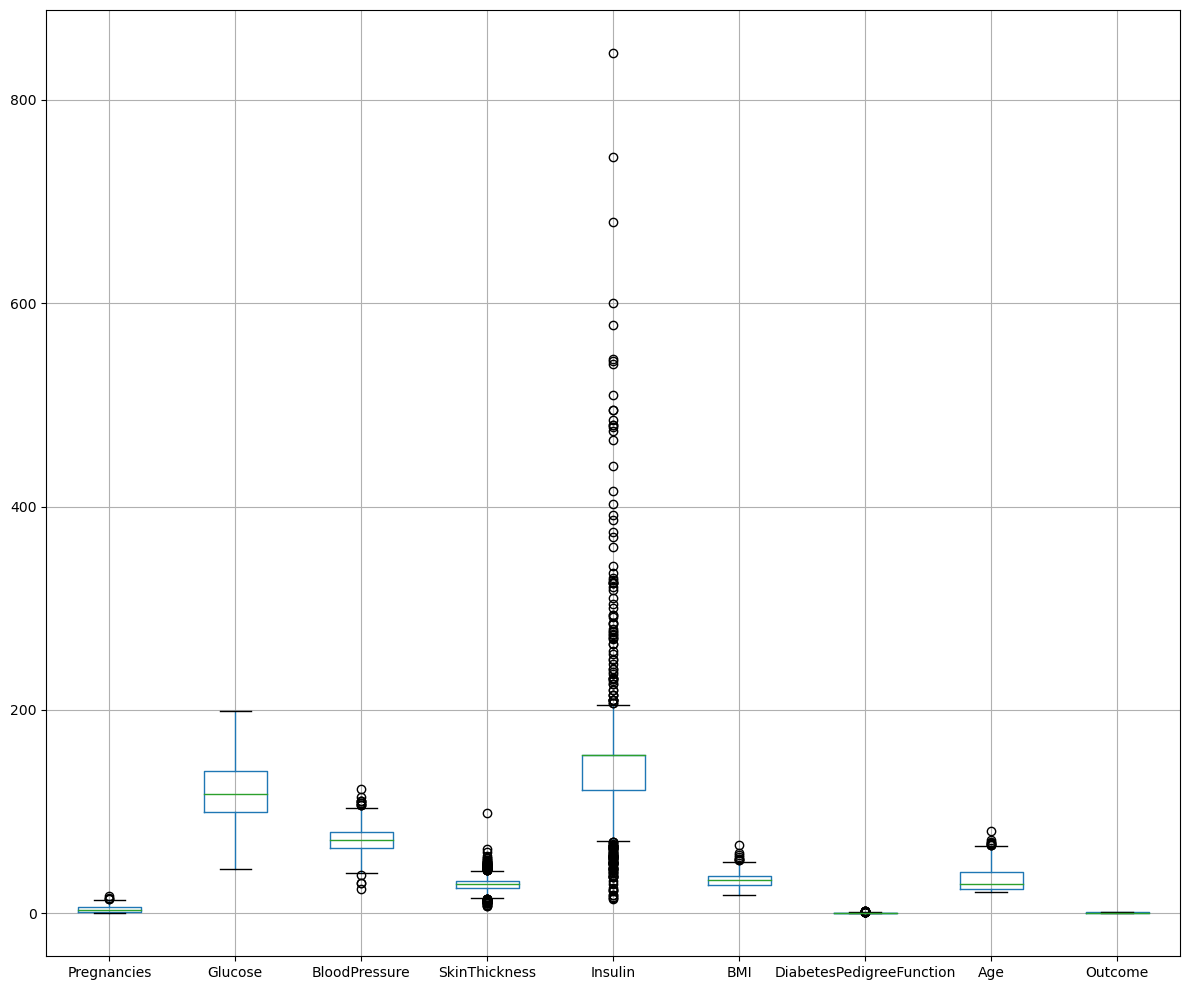

In [57]:
# Boxplots for examining potential outliers and the distribution characteristics
df.boxplot(figsize=(12, 10))
plt.tight_layout()
plt.show()

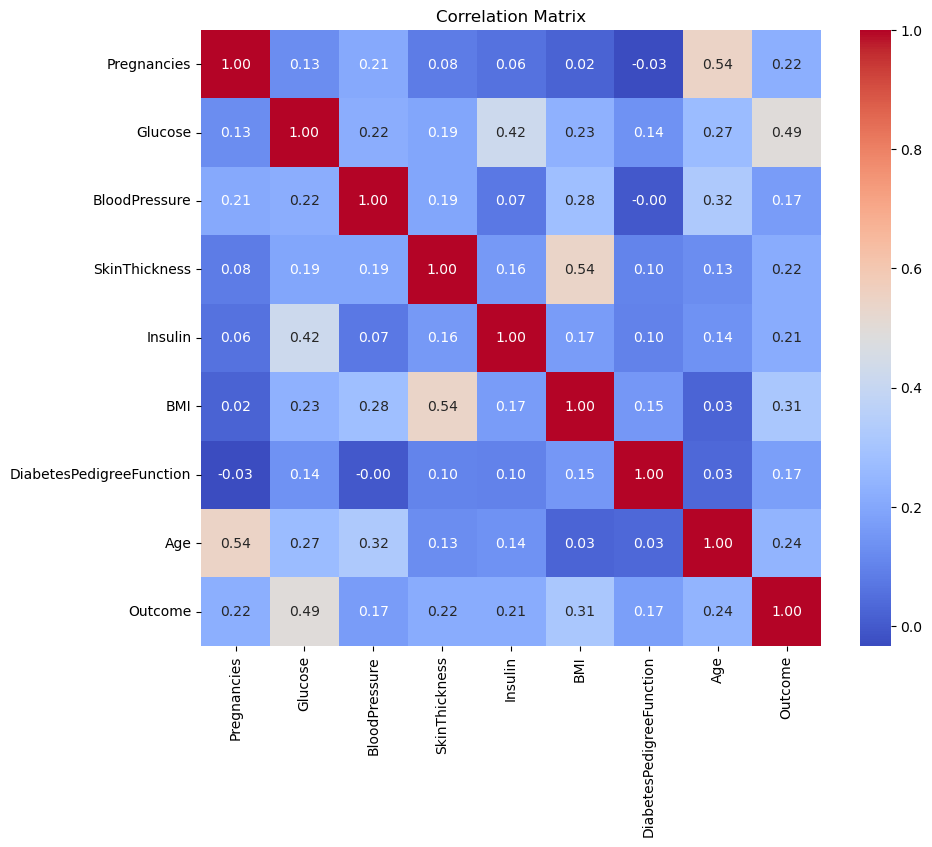

In [58]:
# Correlation matrix to know the relation between the varaibles/ features
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

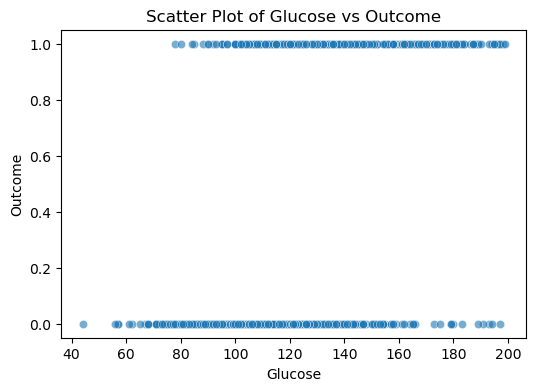

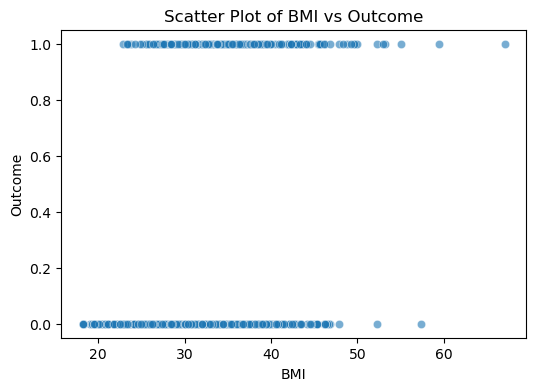

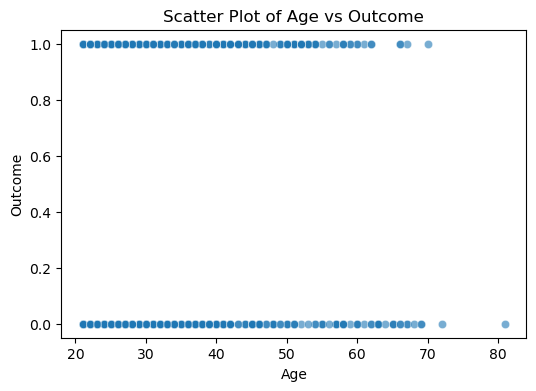

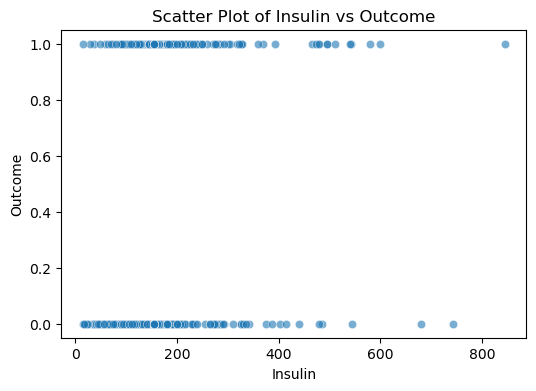

In [59]:
# Scatter plots for a few features vs Outcome
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Outcome', alpha=0.6)
    plt.title(f'Scatter Plot of {feature} vs Outcome')
    plt.show()

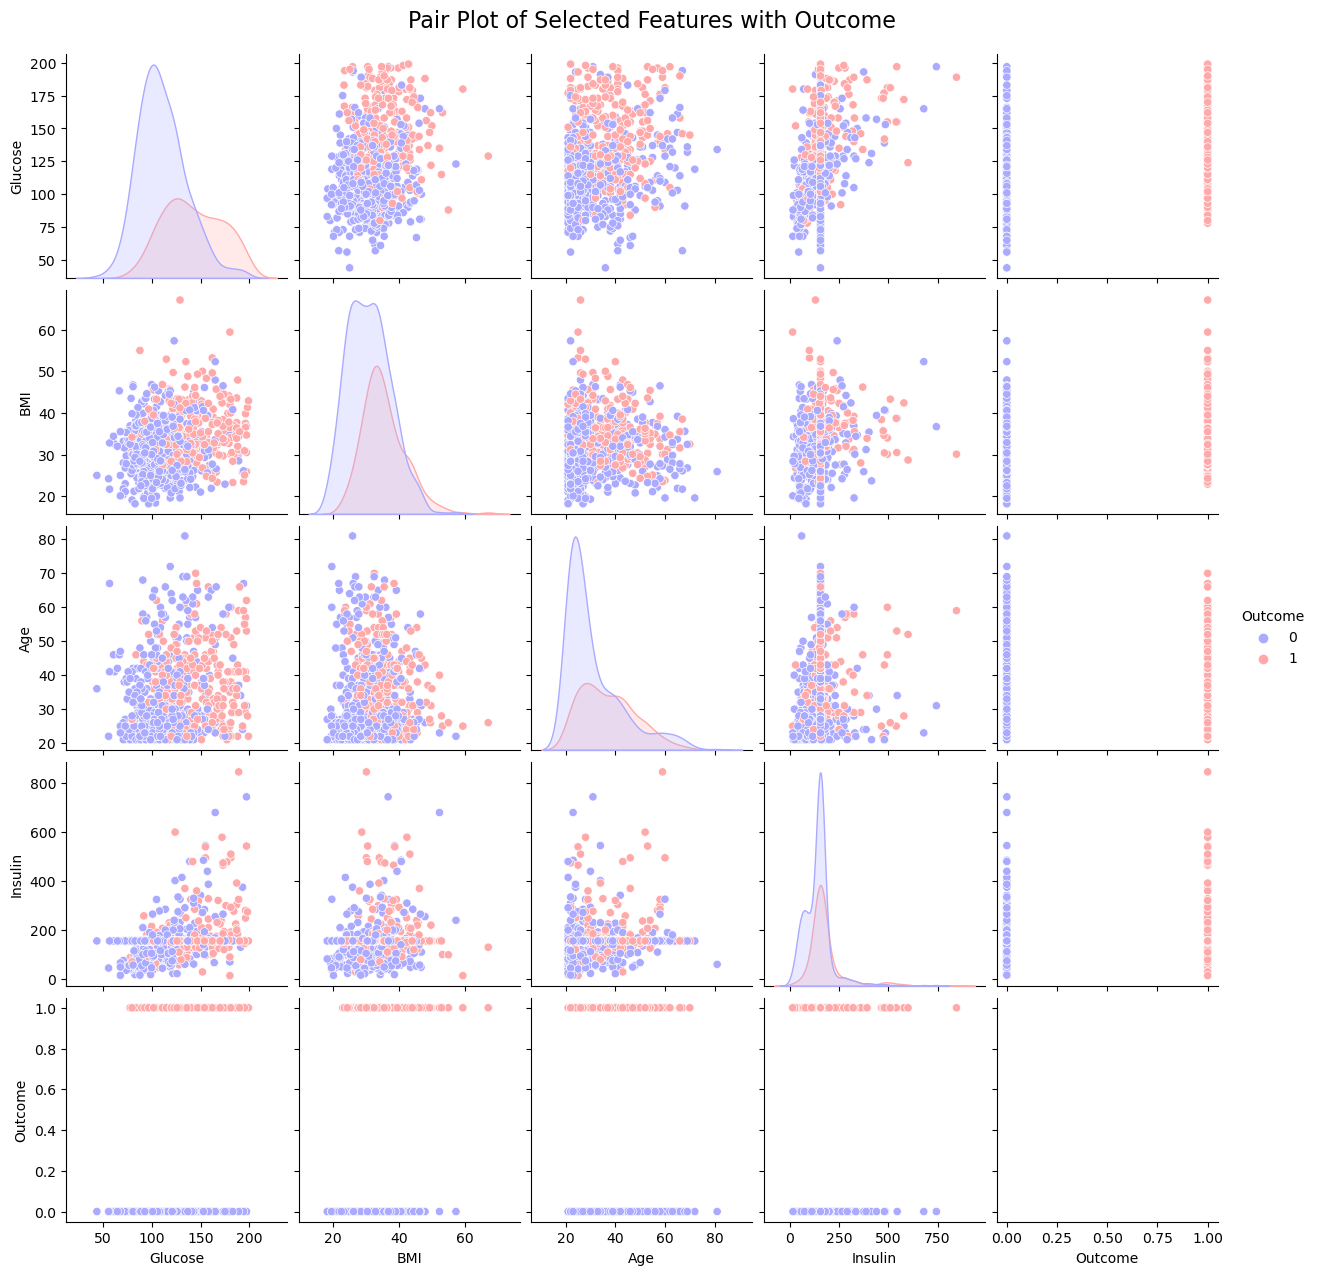

In [60]:
# Pair plot for few features including Outcome
sns.pairplot(df, vars=selected_features + ['Outcome'], hue='Outcome', palette='bwr')
plt.suptitle('Pair Plot of Selected Features with Outcome', size=16, y=1.02)
plt.show()


In [61]:
# To compare the means of a feature for diabetic vs. non-diabetic groups to determine if the differences are statistically significant
def perform_statistical_tests(df, column_name):
    # Performing a t-test between the means of the given column for diabetic and non-diabetic groups
    non_diabetic_values = df[df['Outcome'] == 0][column_name]
    diabetic_values = df[df['Outcome'] == 1][column_name]
    t_stat, p_val = stats.ttest_ind(non_diabetic_values, diabetic_values) 
    
    # The t-test statistic is a measure of the difference between the two groups which are non-diabetic vs diabetic in terms of their mean Glucose levels
    
    # Performing ANOVA (Analysis of Variance) using the given column and 'Outcome'
    anova_results = ols(f'{column_name} ~ C(Outcome)', data=df).fit()
    aov_table = sm.stats.anova_lm(anova_results, typ=2)
    
    # Return the test results
    return t_stat, p_val, aov_table

# List of columns to test
columns_to_test = ['Glucose', 'BMI', 'BloodPressure', 'Insulin', 'Age']

# Dictionary to hold test results for each column
statistical_test_results = {}

# Perform the tests on the specified columns
for column in columns_to_test:
    t_stat, p_val, aov_table = perform_statistical_tests(df, column)
    statistical_test_results[column] = {
        't-statistic': t_stat,
        'p-value': p_val,
        'ANOVA': aov_table
    }
    
    # Output the results
    print(f"Results for {column}:")
    print(f"t-Test: t-statistic = {t_stat}, p-value = {p_val}\n")
    print("ANOVA:")
    print(aov_table)
    print("\n" + "-"*50 + "\n")



Results for Glucose:
t-Test: t-statistic = -15.67989823120835, p-value = 2.909251656846331e-48

ANOVA:
                   sum_sq     df           F        PR(>F)
C(Outcome)  172637.622487    1.0  245.859209  2.909252e-48
Residual    537870.513817  766.0         NaN           NaN

--------------------------------------------------

Results for BMI:
t-Test: t-statistic = -9.086387041809552, p-value = 8.59530088427667e-19

ANOVA:
                  sum_sq     df          F        PR(>F)
C(Outcome)   3527.431203    1.0  82.562429  8.595301e-19
Residual    32726.899128  766.0        NaN           NaN

--------------------------------------------------

Results for BloodPressure:
t-Test: t-statistic = -4.661098993631144, p-value = 3.709288185093571e-06

ANOVA:
                   sum_sq     df          F    PR(>F)
C(Outcome)    3095.318461    1.0  21.725844  0.000004
Residual    109133.341839  766.0        NaN       NaN

--------------------------------------------------

Results for Insulin:


In [62]:
# Separating the features and the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [63]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Initialize the models with probability enabled for SVM
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)  # Enable probability for SVM
}

In [66]:
# Making a Dictionary to store the models performance metrics
model_performance = {}

In [67]:
# Training and evaluating the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculating accuracy and other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the performance metrics
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': clf_report,
        'Confusion Matrix': conf_matrix
    }
    
    # Output the performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy}\n")
    print("Classification Report:")
    print(clf_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n" + "-"*50 + "\n")

Logistic Regression Performance:
Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[82 17]
 [21 34]]

--------------------------------------------------

Decision Tree Performance:
Accuracy: 0.7012987012987013

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        99
           1       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154

Confusion Matrix:
[[75 24]
 [22 33]]

--------------------------------------------------



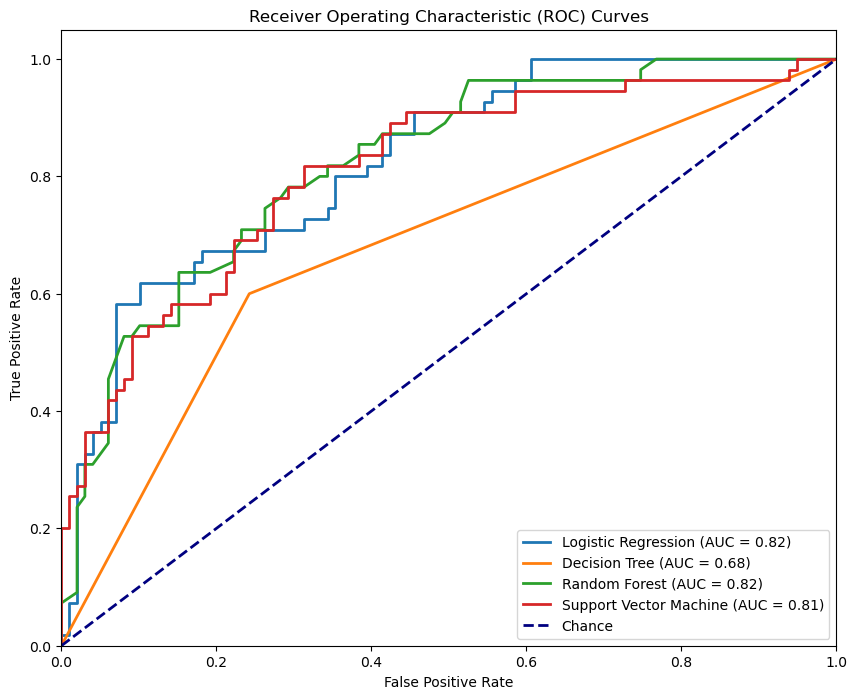

In [68]:
# Function to plot ROC curve for each model
def plot_roc_curve(model, X_test_scaled, y_test, model_name):
    # Predicting probabilities
    probabilities = model.predict_proba(X_test_scaled)
    
    # Computing ROC curve and area under the curve
    # fpr is False Postive Rate and tpr is True Posititve Rate
    fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    plot_roc_curve(model, X_test_scaled, y_test, model_name)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


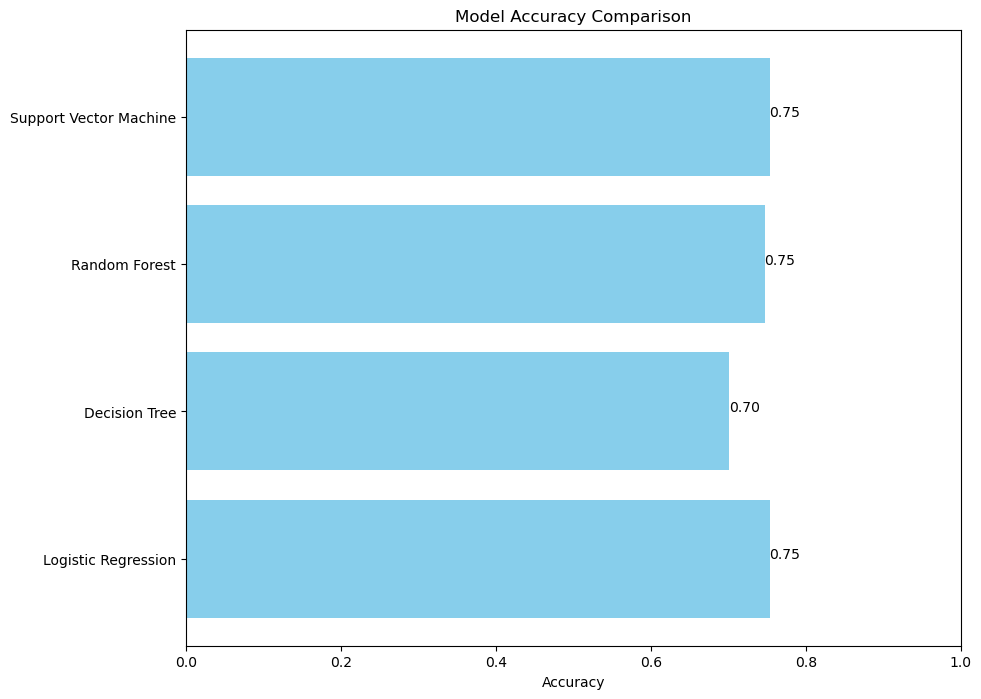

In [69]:
# Plotting the accuracy comparison
accuracies = [model_performance[m]['Accuracy'] for m in models.keys()]
model_names = list(models.keys())

plt.figure(figsize=(10, 8))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
for index, value in enumerate(accuracies):
    plt.text(value, index, f"{value:.2f}")
plt.show()

In [70]:
# Making a Dictionary to store the cross-validation scores
cv_scores = {}

# Performing 10-fold cross-validation for each model and store the results
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} 10-fold CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plotting the results
plt.figure(figsize=(12, 6))

Logistic Regression 10-fold CV Accuracy: 0.77 (+/- 0.08)
Decision Tree 10-fold CV Accuracy: 0.69 (+/- 0.09)
Random Forest 10-fold CV Accuracy: 0.76 (+/- 0.09)
Support Vector Machine 10-fold CV Accuracy: 0.75 (+/- 0.08)


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

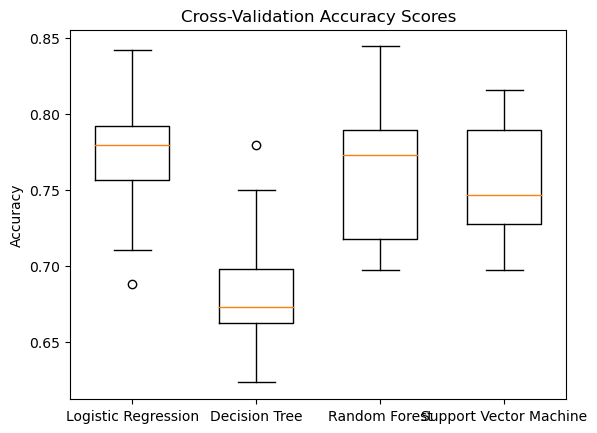

In [71]:
# Creating a boxplot for the cross-validation scores
for i, (model_name, scores) in enumerate(cv_scores.items()):
    plt.boxplot(scores, positions=[i], widths=0.6)

# Setting the labels and titles
plt.xticks(range(len(models)), models.keys())
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

In [72]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter tuninig
# Defining the parameter grid for logistic regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # The norm of the penalty
    'solver': ['liblinear', 'saga']  # Algorithm to use for optimization
}

# Initializing the logistic regression classifier
log_reg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search and fit the model
grid_search.fit(X_train_scaled, y_train)

# Print out the best parameters, best score, and the best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l

In [73]:
# best grid attribute
best_log_reg = grid_search.best_estimator_

# Since grid search performs the fit during the search, there's no need to refit the model.
# The model is already trained with the best combination of parameters found.

# Make predictions on the test set using the best logistic regression model
y_pred = best_log_reg.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report, which includes precision, recall, f1-score, and support
clf_report = classification_report(y_test, y_pred)

# Generate the confusion matrix, which shows the correctly and incorrectly classified examples
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation results
print(f'Accuracy: {accuracy}\n')
print('Classification Report:')
print(clf_report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7792207792207793

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Confusion Matrix:
[[86 13]
 [21 34]]


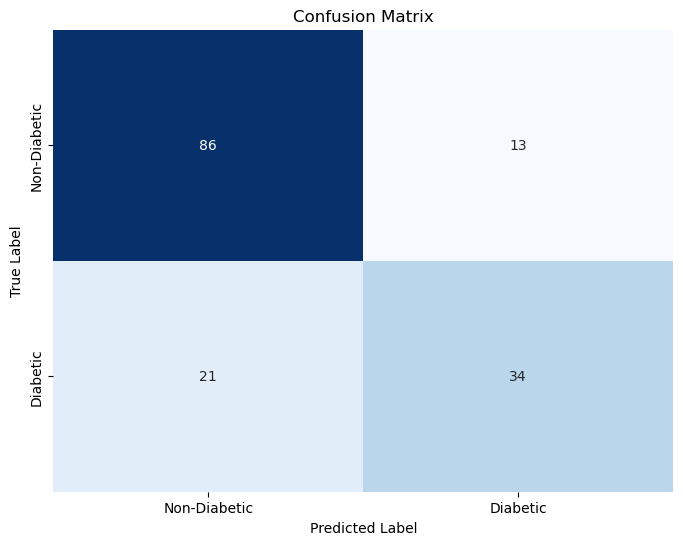

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.yticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'], va='center')
plt.show()


In [75]:
# Saving the scaler to a file
joblib.dump(scaler, 'finalscaler.pkl')


['finalscaler.pkl']

In [76]:
# Saving the model to a file
joblib.dump(best_log_reg, 'FinalDiabetes_model.pkl')

['FinalDiabetes_model.pkl']